In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats

# Fourier Methods for Option Pricing

## Overview
1. Fourier Transform
2. Fourier Cosine Series and COS Method
3. Fast Fourier Transform

## Fourier Transform

Consider a function $f(\cdot)$ such that

$$\int_{\mathbb{R}^n} |f(x)| dx < \infty$$

Then for a 1-dimensional case, the Fourier Transform of $f(\cdot)$ is defined as

$$\hat{f}(\omega) = \int_{-\infty}^{\infty} f(x)e^{i\omega x}dx$$

We are able to convert between the original function $f(x)$ and the Fourier Transform $\hat{f}(\omega)$ using Fourier inverse transform. This is only possible if the following conditions are met:

- $\int_{-\infty}^\infty|\hat{f}(\omega)|d\omega < \infty$, i.e. integrability
- $f(x)$ is continuous at $x$, i.e. continuity

If the above conditions are met, then the inverse transform is as follow:
$$f(x) = \frac{1}{2\pi}\int_{-\infty}^{\infty}\hat{f}(\omega)e^{-i\omega x}d\omega$$

Recall, the Moment Generating Function

$$\begin{aligned}\mathcal{M}_X(\theta) &= \mathbb{E}[e^{\theta X}] \\
&= \int_{-\infty}^{\infty} f(x)e^{\theta x} dx \end{aligned}$$



We now define the characteristic function of X, where X is a r.v. which only takes real values, as:
$$\phi_X(\omega) = \mathbb{E}[e^{i \omega X}] = \hat{f}(\omega)$$

So, we are able to express the Fourier inverse transform as follows:
$$\begin{aligned}f(x) &= \frac{1}{2\pi}\int_{-\infty}^{\infty}\hat{f}(\omega)e^{-i\omega x}d\omega\\
&= \frac{1}{2\pi}\int_{-\infty}^\infty \phi_X(\omega) e^{-i\omega x} d\omega \end{aligned}$$



---

## Call option pricing using Fourier Transform

Recall, to price a call option, we start with:

$$\begin{aligned}V_c &= e^{-rT}\mathbb{E^Q}[(S_T - K)^+]\\
&= e^{-rT}\mathbb{E^Q}[S_T\mathbb{1}_{\{S_T > K\}}] - e^{-rT}\mathbb{E^Q}[K\mathbb{1}_{\{S_T > K\}}]\\
&= e^{-rT}\mathbb{E^Q}[S_T\mathbb{1}_{\{S_T > K\}}] - e^{-rT}K\mathbb{Q}[S_T > K]
\end{aligned}$$

where $\mathbb{Q}[A]$ is the probability of A occuring under the $\mathbb{Q}$-measure.

### Gil-Pelaez Theorem
The theorem states that if X is a random variable with characteristic function $\phi_X(t)$, then:
$$\mathbb{P}[X \ge x] = \frac{1}{2} - \frac{1}{\pi}\int_0^{\infty}\frac{Im[e^{-itx}\phi_x(t)]}{t}dt$$

where $Im(Z)$ is the imaginary part of a complex number Z.

We are now halfway closer to applying Gil-Pelaez Theorem. The next step is to convert the term $e^{-rT}\mathbb{E^Q}[S_T\mathbb{1}_{\{S_T > K\}}]$ as a probability. We can do this by using a change of numeraire and define an equivalent martingale measure $\mathbb{Q}^A$.

### Equivalent Martingale Measure

Suppose A and B are both numeraires with EMMs given by $\mathbb{Q}^A$ and $\mathbb{Q}^B$ respectively. Then: 
$$A_0 \mathbb{E^{Q^A}}\bigg[\frac{X}{A_T}\bigg] = B_0 \mathbb{E^{Q^B}}\bigg[\frac{X}{B_T}\bigg]$$

One possible numeraire is $B_T = e^{rT}$, which is a risk-free cash account. Another possible numeraire is $S_T$ itself.
With these two numeraire, we apply the theorem as follows:

$$ \mathbb{E^{Q}}\bigg[\frac{S_T\mathbb{1}_{\{S_T > K\}}}{e^{rT}}\bigg] = S_0 \mathbb{E^{Q^S}}\bigg[\frac{S_T\mathbb{1}_{\{S_T > K\}}}{S_T}\bigg]$$

Therefore, our call option pricing formula becomes:

$$\begin{aligned}V_c &= e^{-rT}\mathbb{E^Q}[S_T\mathbb{1}_{\{S_T > K\}}] - e^{-rT}K\mathbb{Q}[S_T > K]\\
&= S_0\mathbb{E^{Q^S}}\bigg[\frac{S_T\mathbb{1}_{\{S_T > K\}}}{S_T}\bigg] - e^{-rT}K\mathbb{Q}[S_T > K]\\
&= S_0\mathbb{Q^S}[S_T > K]- e^{-rT}K\mathbb{Q}[S_T > K] \end{aligned}\tag{1}$$

Recall, under the Black-Scholes model, asset pricing dynamics has a SDE of:

$$dS_t = (r - \frac{1}{2}\sigma^2)dt + \sigma dW_t^{\mathbb{Q}}$$

Under $\mathbb{Q}$-measure, our asset price follows a lognormal distribution as follows:
$$ln(S_T) \sim N\bigg(ln(S_0) + (r - \frac{1}{2}\sigma^2)T, \sigma^2 T\bigg)$$

Recall also, the Moment Generating Function of a random variable $X \sim N(\mu, \sigma^2)$,
$$\mathbb{E}[e^{\theta x}] = e^{\mu\theta + \frac{1}{2}\sigma^2\theta^2}$$

Let $M_1 = lnS_T$, therefore the characteristic function is
$$\phi_{M_1}(t) = exp\bigg(it\bigg(lnS_0 + \bigg(r - \frac{1}{2}\sigma^2\bigg)T\bigg) - \frac{1}{2}\sigma^2Tt^2\bigg)\tag{2}$$

### Girsanov Theorem

Let $\mathbb{P}$ denote the probability measure under the PDF $f(x)$, and let $\tilde{\mathbb{P}}$ denote the probability measure under the PDF $\tilde{f}(x)$. The Radon-Nikodym derivative is then defined as

$$\frac{d\mathbb{P}}{d\tilde{\mathbb{P}}} = \frac{f(x)}{\tilde{f}(x)} > 0$$

The Radon-Nikodym derivative allows one to change probability measure under which the expectation is evaluated:

$$\mathbb{E^P}\bigg[g(X_t)\bigg] = \mathbb{E^\tilde{P}}\bigg[g(X_t)\frac{d\mathbb{P}}{d\tilde{\mathbb{P}}}\bigg]$$

The Girsanov Theorem states that if $W_T$ is a $\mathbb{P}$-Brownian motion and $\kappa$ satisfies $\mathbb{E^P}[exp(\frac{1}{2}\kappa^2T)] < \infty$, then there exist a measure $\mathbb{Q}$ s.t.
- $\mathbb{Q}$ is equivalent to $\mathbb{P}$
- $\frac{d\mathbb{Q}}{d\mathbb{P}} = exp(-\kappa W_T - \frac{1}{2}\kappa^2T)$
- $W_T^{\mathbb{Q}} = W_T + \kappa T$ is a $\mathbb{Q}$-Brownian motion

Therefore,

$$\begin{aligned} \mathbb{E^{Q}}\bigg[\frac{S_T\mathbb{1}_{\{S_T > K\}}}{e^{rT}}\bigg] &= S_0 \mathbb{E^{Q^S}}\bigg[\frac{S_T\mathbb{1}_{\{S_T > K\}}}{S_T}\bigg]\\
&= \mathbb{E^{Q^S}}\bigg[\frac{S_T\mathbb{1}_{\{S_T > K\}}}{e^{rT}exp(-\frac{1}{2}\sigma^2T + \sigma W_T^{\mathbb{Q}})}\bigg]
\end{aligned} $$

Then, the Radon-Nikodym derivatives is:
$$\frac{d\mathbb{Q}^S}{d\mathbb{Q}} = exp\bigg(\sigma W_T^{\mathbb{Q}} - \frac{1}{2}\sigma^2T\bigg)$$

By Girsanov Theorem, there exists a $\mathbb{Q}^S$-Brownian motion
$$W_T^{\mathbb{Q}^S} = W_T^\mathbb{Q} - \sigma T$$
$$dW_t^{\mathbb{Q}^S} = dW_t^\mathbb{Q} - \sigma dt$$

Then, the asset price dynamics follows a lognormal stochastic process under the $\mathbb{Q}^S$-measure as follows
$$dS_t = (r + \frac{1}{2}\sigma^2)dt + \sigma dW_t^{\mathbb{Q}^S}$$
$$ln(S_T) \sim N\bigg(ln(S_0) + (r + \frac{1}{2}\sigma^2)T, \sigma^2 T\bigg)$$

Let $M_2 = lnS_T$ under the EMM $\mathbb{Q}^S$, then our characteristic function is
$$\begin{aligned}\phi_{M_2}(t) &= exp\bigg(it\bigg(lnS_0 + \bigg(r + \frac{1}{2}\sigma^2\bigg)T\bigg) - \frac{1}{2}\sigma^2Tt^2\bigg)\\
&= exp(it\sigma^2T)\phi_{M_1}(t)\end{aligned}\tag{2}$$

Applying the Gil-Pelaez Theorem and substituting (2) and (3) into (1), we get

$$\begin{aligned}
V_c &= S_0\mathbb{Q^S}[S_T > K]- e^{-rT}K\mathbb{Q}[S_T > K]\\
&= S_0(1 - \mathbb{Q^S}[S_T < K]) - e^{-rT}K(1 - \mathbb{Q}[S_T < K])\\
&= S_0(1 - \mathbb{Q^S}[ln(S_T) < ln(K)]) - e^{-rT}K(1 - \mathbb{Q}[ln(S_T) < ln(K)])\\
&= S_0\bigg(\frac{1}{2} + \frac{1}{\pi}\int_0^{\infty}\frac{Im[e^{-itln(K)}\phi_{M_2}(t)]}{t}dt\bigg) - e^{-rT}K\bigg(\frac{1}{2} + \frac{1}{\pi}\int_0^{\infty}\frac{Im[e^{-itln(K)}\phi_{M_1}(t)]}{t}dt\bigg)
\end{aligned} \tag{4}$$

---

## Implementing F.T. in Option pricing in Python

Now, we will attempt to implement Fourier Transform option pricing model.

### Dealing with Integrals

Since we are implementing the model numerically, we have the choice of applying scipy.integrate directly or we can apply do approximation. Here, we shall choose the latter.


$$\begin{aligned}\int_0^{\infty}\frac{Im[e^{-itln(K)}\phi_{M_1}(t)]}{t}dt &\approx \int_0^{t_{max}}\frac{Im[e^{-itln(K)}\phi_{M_1}(t)]}{t}dt \\
&\approx \sum_{n=1}^N \frac{Im[e^{-it_nln(K)}\phi_{M_1}(t_n)]}{t_n} \Delta t\end{aligned}$$

Then, our call option formula applied using Python will follow Eq. (5)

$$V_c \approx S_0\bigg(\frac{1}{2} + \frac{1}{\pi}\sum_{n=1}^N \frac{Im[e^{-it_nln(K)}\phi_{M_2}(t_n)]}{t_n} \Delta t\bigg) - e^{-rT}K\bigg(\frac{1}{2} + \frac{1}{\pi}\sum_{n=1}^N \frac{Im[e^{-it_nln(K)}\phi_{M_1}(t_n)]}{t_n} \Delta t\bigg)\tag{5}$$

### Put-Call parity

Recall, Put and Call options are related through the put-call parity, as follows:

$$V_c - V_p = S - Ke^{-rT}$$

Therefore, put option pricing using Fourier Transform will follow Eq. (6):

$$V_p \approx S_0\bigg(-\frac{1}{2} + \frac{1}{\pi}\sum_{n=1}^N \frac{Im[e^{-it_nln(K)}\phi_{M_2}(t_n)]}{t_n} \Delta t\bigg) - e^{-rT}K\bigg(-\frac{1}{2} + \frac{1}{\pi}\sum_{n=1}^N \frac{Im[e^{-it_nln(K)}\phi_{M_1}(t_n)]}{t_n} \Delta t\bigg) \tag{6}$$

In [2]:
# Analytical solution based on Black-Scholes option pricing formula
def black_scholes_option_pricer(S, K, r, T, sigma, call = True):
    '''
    Function calculates option prices based on Black-scholes model.
    
    Inputs:
    S: underlying asset price at t; can be an array of prices
    K: strike price; can be an array of prices
    r: interest rate, annualized
    T: time to expiration (also the T-t in our equations), in number of years
    sigma: implied volatility of the option
    call: default True. True if pricing call options; otherwise False

    Outputs:
    Option Prices.
    '''

    d2 = (np.log(S/K) +(r - 0.5*np.square(sigma))*(T))/(sigma*np.sqrt(T))
    d1 = d2 + sigma*np.sqrt(T)
    
    d2 = d2 if call == True else -d2
    d1 = d1 if call == True else -d1


    option_values = S*scipy.stats.norm.cdf(d1) - K*np.exp(-r*T)*scipy.stats.norm.cdf(d2)
    option_values = option_values if call == True else -option_values

    return option_values

In [3]:
# Underlying asset information
r = 0.06
S0 = 100
sigma = 0.3

# Option information
K = 110
T = 1


In [4]:
def fourier_transform_option_pricing(S0, K, sigma, t_max, N, T, call = True):
    delta_t = t_max/N
    t_n = (np.linspace(1,N,N) - 1/2) * delta_t
    
    K_log = np.log(K)
    
    C_M1 = np.exp(1j*t_n*(np.log(S0)+(r - 0.5*sigma**2)*T)-0.5*sigma**2*T*t_n**2)
    C_M2 = C_M1*np.exp(1j*t_n*sigma**2*T)
    
    first_integral = np.sum((np.exp(-1j*t_n*K_log)*C_M2).imag/t_n*delta_t)
    second_integral = np.sum((np.exp(-1j*t_n*K_log)*C_M1).imag/t_n*delta_t)
    
    if call == True:
        opt_val = S0*(0.5 + 1/np.pi * first_integral) - np.exp(-r*T)*K*(0.5 + 1/np.pi*second_integral)
    else:
        opt_val = S0*(-0.5 + 1/np.pi * first_integral) - np.exp(-r*T)*K*(-0.5 + 1/np.pi*second_integral)
        
    return opt_val

In [5]:
# Test call option value:
bs_call = black_scholes_option_pricer(S0, K, r, T, sigma)
ft_call = fourier_transform_option_pricing(S0, K, sigma, 20, 100, T)

print('Black-Scholes option pricing model returns a call value of: ', bs_call)
print('Fourier Transform option pricing model returns a call value of: ', ft_call)

Black-Scholes option pricing model returns a call value of:  10.424100458714285
Fourier Transform option pricing model returns a call value of:  10.424100443080043


In [6]:
# Test put option value:
bs_put = black_scholes_option_pricer(S0, K, r, T, sigma, call = False)
ft_put = fourier_transform_option_pricing(S0, K, sigma, 20, 100, T, call = False)

print('Black-Scholes option pricing model returns a call value of: ', bs_put)
print('Fourier Transform option pricing model returns a call value of: ', ft_put)

Black-Scholes option pricing model returns a call value of:  14.018199152981637
Fourier Transform option pricing model returns a call value of:  14.018199137347402


---

## Introduction: the COS Method

### Fourier-Cosine Series Expansion

Suppose $f(x)$ is a function that is defined and integrable over the interval $[0, \pi]$.
We are able to express f(x) as:

$$f(x) = \frac{a_0}{2} + \sum_{n=1}^\infty a_ncos(nx)$$

and $a_n$ is defined as:

$$a_n = \frac{2}{\pi}\int_0^\pi f(x)cos(nx)dx$$

In order to apply the fourier-cosine expansion for integrals with more general bound $[b_1,b_2]$, apply the following variable transformation:

$$x = \pi \frac{y - b_1}{b_2 - b_1}$$
$$dx = \frac{\pi}{b_2 - b_1} dy$$

After the variable transformation, the function $f(x)$ may now be expressed as:

$$f(y) = \frac{a_0}{2} + \sum_{n=1}^\infty a_n cos\bigg(n\pi\frac{y - b_1}{b_2 - b_1}\bigg)$$

$$a_n = \frac{2}{b_2 - b_1}\int_{b_1}^{b_2}f(y) cos\bigg(n\pi\frac{y - b_1}{b_2 - b_1}\bigg)dy$$

### Application to vanilla European Option

Recall, the payoff of an European option may be expressed as
$$\mathcal{H}(S,T) = [\alpha(S_T - K)^+]$$

where $\alpha$ equals to 1 for call option, and -1 for put option.

let $s = ln(\frac{S_T}{K})$, then
$$p(s) = [\alpha K(e^s - 1)^+]$$

We define then $f_{s_T}(s)$ as the pdf of the distribution of $s_T$.

For an European option, the value of the option is expressed as:

$$\begin{aligned}V_C &= e^{-rT}\int_\infty^\infty p(s)f_{s_T}(s)ds\\
&\approx e^{-rT}\int_{b_1}^{b_2} p(s)f_{s_T}(s)ds\end{aligned}\tag{7}$$

Here, an approximation is made as we limited our integral range within a finite boundary $[b_1,b_2]$.

Applying Fourier-Cosine series expansion on the pdf $f_{s_T}(s)$,

$$f_{s_T}(s) = \frac{a_0}{2} + \sum_{n=1}^\infty a_n cos\bigg(n\pi\frac{s-b_1}{b_2 - b_1}\bigg)$$

$$\begin{aligned}a_n &= \frac{2}{b_2 - b_1}\int_{b_1}^{b_2}f(s)cos\bigg(n\pi\frac{s-b_1}{b_2 - b_1}\bigg)ds\\
&\approx  \frac{2}{b_2 - b_1}Re\bigg(\phi_{s_T}\bigg(\frac{n\pi}{b_2 - b_1}\bigg)e^{-in\pi\frac{b_1}{b_2 - b_1}}\bigg)
\end{aligned}\tag{8}$$

The above derivation is possible, as
$$\phi_{s_T}\bigg(\frac{n\pi}{b_2 - b_1}\bigg) = \int_{-\infty}^\infty f_{s_T}(s) e^{i(\frac{n\pi}{b_2 - b_1}) s}ds = \int_{-\infty}^\infty f_{s_T}(s)\times\bigg(cos\bigg(\frac{n\pi}{b_2 - b_1} \cdot s\bigg) +  i\cdot sin\bigg(\frac{n\pi}{b_2 - b_1} \cdot s\bigg)\bigg)ds$$

using Euler's formula $e^{i\omega} = cos(\omega) + i\cdot sin(\omega)$.

Substituting Eq. (8) into Eq. (7), we derive the call option value as:

$$\begin{aligned}
V_C &\approx e^{-rT}\bigg(\int_{b_1}^{b_2}p(s)\bigg[\frac{a_0}{2} + \sum_{n=1}^\infty a_n cos \bigg(n\pi\frac{s - b_1}{b_2 - b_1}\bigg)\bigg]ds\bigg)\\
\end{aligned} \tag{9}$$

Define $\nu_n$ to be:

$$\nu_n := \frac{2}{b_2 - b_1}\int_{b_1}^{b_2} p(s) cos\bigg(n\pi\frac{s - b_1}{b_2 - b_1}\bigg)ds\tag{10}$$

Then, we can further express the option value by substituting (8) and (10) into (9):
$$\begin{aligned}
V_C &\approx e^{-rT}\bigg(\int_{b_1}^{b_2}p(s)\bigg[\frac{a_0}{2} + \sum_{n=1}^\infty a_n cos \bigg(n\pi\frac{s - b_1}{b_2 - b_1}\bigg)\bigg]ds\bigg)\\
&\approx e^{-rT}\bigg(\frac{\nu_0 \phi_{s_T}(0)}{2} + \sum_{n=1}^{N-1} Re\bigg(\phi_{s_T}\bigg(\frac{n\pi}{b_2 - b_1}\bigg)e^{-in\pi\frac{b_1}{b_2 - b_1}}\bigg)\nu_n\bigg)
\end{aligned} \tag{11}$$

### Deriving approximated call option value using COS method

Before evaluating the option price, let's evaluate the Fourier-Cosine Series expansion of two functions: $f(x) =e^x$ and $f(x) = 1$. Define:

$$\begin{aligned}
\gamma_n(c,d) &:= \int^d_c e^scos\bigg(n\pi\frac{s - b_1}{b_2 - b_1}\bigg) ds\\
&= \frac{cos\bigg(n\pi \frac{d-b_1}{b_2 - b_1}\bigg)e^d - cos\bigg(n\pi\frac{c - b_1}{b_2 - b_1}\bigg)e^c + \frac{n\pi}{b_2 - b_1}\bigg(sin\bigg(n\pi\frac{d - b_1}{b_2 - b_1}\bigg)e^d - sin\bigg(n\pi\frac{c - b_1}{b_2 - b_1}\bigg)e^c\bigg)}{1 + \bigg(\frac{n\pi}{b_2 - b_1}\bigg)^2}
\end{aligned}$$


$$\psi_n(c,d) := \int^d_c cos\bigg(n\pi\frac{s - b_1}{b_2 - b_1}\bigg) ds = \begin{cases} \frac{b_2 - b_1}{n\pi}\bigg[sin\bigg(n\pi\frac{d - b_1}{b_2 - b_1}\bigg) - sin\bigg(n\pi\frac{c - b_1}{b_2 - b_1}\bigg)\bigg] & \text{for } n \ne 0\\
d - c & \text{for } n = 0\end{cases}$$

For a call option, the payoff is given by $p(s) = K(e^s - 1)\mathbb{1}_{s > 0}$

Therefore, $\nu_n$ becomes:

$$\begin{aligned}
\nu_n &= \frac{2}{b_2 - b_1} \int_0^{b_2} K(e^s - 1) cos\bigg(n\pi\frac{s - b_1}{b_2 - b_1}\bigg)ds\\
&= \frac{2}{b_2 - b_1}K(\gamma_n(0,b_2) - \psi_n(0, b_2))
\end{aligned} \tag{12}$$

### Choosing appropriate $[b_1, b_2]$

According to Fang(2010), one can determine $b_1$ and $b_2$ using the formulae as follows:

$$b_1 = \zeta_1 - L\sqrt{\zeta_2 + \sqrt{\zeta_4}}$$
$$b_2 = \zeta_1 + L\sqrt{\zeta_2 + \sqrt{\zeta_4}}$$

Where L = 10, and $\zeta_K$ is the kth-cumulant of s_T.

By defintion, the Cumulant-Generating Function is related to the Moment Generating Function by

$$\zeta_X(u) = log \mathcal{M_X}(u)$$

And the kth-cumulant is given by

$$\zeta_k = \frac{\partial^k \zeta_X(u)}{\partial u^k}|_{u = 0}$$

Given that $s = log(\frac{S_T}{K}) \sim \mathcal{N}(log(\frac{S_0}{K}) + (r - \frac{1}{2}\sigma^2)T, \sigma^2T)$

Then, the cumulants are $\zeta_1 = \mathbb{E}[s_T]$, $\zeta_2 = var(s_T)$, $\zeta_4 = 0$

Characteristic function of $s_T$
$$\phi_{s_T}(u) = exp\bigg(iu\bigg(log\bigg(\frac{S_0}{K}+\bigg(r - \frac{\sigma^2}{2}\bigg)T\bigg) - \frac{\sigma^2Tu^2}{2}\bigg)\bigg)$$

---

## Implementing COS method for Option Pricing in Python


In [7]:
def gamma_n(b1, b2, c, d, n):
    n_pi_c = n*np.pi*(c - b1)/(b2 - b1)
    n_pi_d = n*np.pi*(d - b1)/(b2 - b1)
    n_pi = n*np.pi/(b2 - b1)
    
    numerator = np.cos(n_pi_d)*np.exp(d) - np.cos(n_pi_c)*np.exp(c) + n_pi*(np.sin(n_pi_d)*np.exp(d) 
                                                                            - np.sin(n_pi_c)*np.exp(c))
    denominator = 1 + n_pi**2
    
    return numerator/denominator

def psi_n(b1, b2, c, d, n):
    n_pi_c = n*np.pi*(c - b1)/(b2 - b1)
    n_pi_d = n*np.pi*(d - b1)/(b2 - b1)
    
    if n!= 0:
        return (b2 - b1)*(np.sin(n_pi_d) - np.sin(n_pi_c))/(n*np.pi)
    
    else:
        return d - c

def nu_n(b1, b2, c, d, n, K, call = True):
    if call == True:
        c = 0
        d = b2
    else:
        c = b1
        d = 0
    gamma = gamma_n(b1, b2, c, d, n)
    psi = psi_n(b1, b2, c, d, n)
    
    return 2/(b2 - b1)*K*(gamma - psi) if call == True else 2/(b2 - b1)*K*(psi - gamma)
    

def char_fxn(u, S0, K, r, sigma, T):
    return np.exp(1j*u*(np.log(S0/K) + (r - 0.5*sigma**2)*T) - 0.5*(sigma**2)*T*(u**2))
                     
def COS_option_pricing(S0, K, sigma, N, T, call = True):
    
    # Define cumulants
    c1 = np.log(S0/K) + (r - 0.5*sigma**2)*T
    c2 = (sigma**2)*T
    c4 = 0
    L = 10
    
    # Define boundaries b1 & b2
    b1 = c1 - L*np.sqrt(c2+np.sqrt(c4))
    b2 = c1 + L*np.sqrt(c2+np.sqrt(c4))
    
    # Get opt val
    nu_0 = nu_n(b1, b2, 0, b2, 0, K, call)
    price = nu_0*char_fxn(0, S0, K, r, sigma, T)/2
    
    for n in range(1,N):
        u = n*np.pi/(b2 - b1)

        price += char_fxn(u, S0, K, r, sigma, T)*np.exp(-1j*u*b1)*nu_n(b1, b2, 0, b2, n, K, call)
        
    return np.exp(-r*T)*price.real
    

In [8]:
COS_call_price = [None]*50

for i in range(1,51):
    COS_call_price[i-1] = COS_option_pricing(S0, K, sigma, i, T)

In [9]:
COS_put_price = [None]*50

for i in range(1,51):
    COS_put_price[i-1] = COS_option_pricing(S0, K, sigma, i, T, call = False)

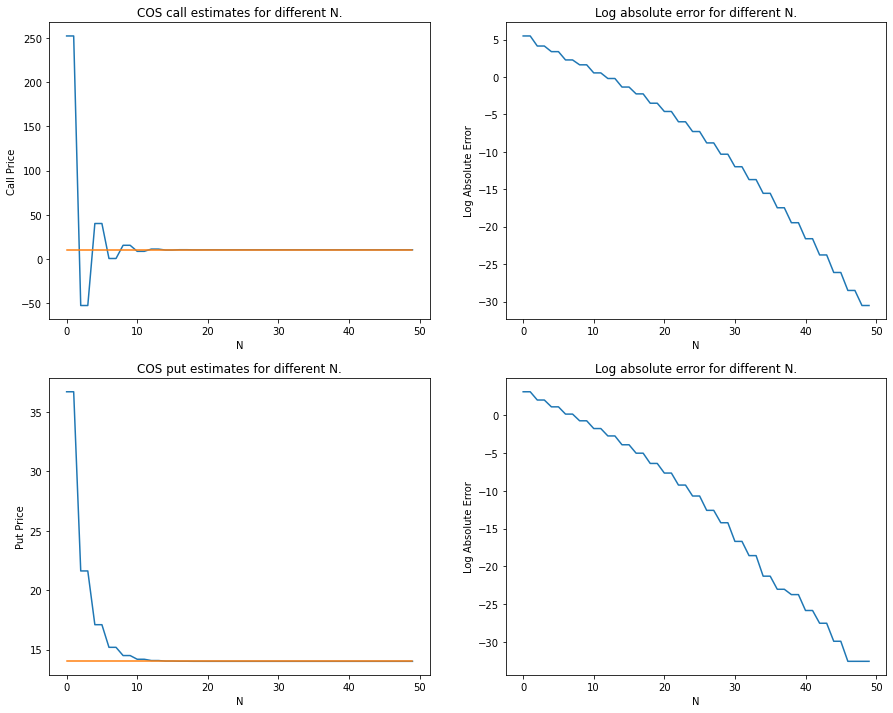

In [10]:
x = np.arange(0,50,1)
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
axs[0,0].plot(x, COS_call_price)
axs[0,0].plot(x, [bs_call]*50)
axs[0,0].set_title('COS call estimates for different N.')
axs[0,0].set(xlabel="N", ylabel="Call Price")

axs[0,1].plot(x, np.log(np.absolute(COS_call_price - bs_call)))
axs[0,1].set_title('Log absolute error for different N.')
axs[0,1].set(xlabel="N", ylabel="Log Absolute Error")

axs[1,0].plot(x, COS_put_price)
axs[1,0].plot(x, [bs_put]*50)
axs[1,0].set_title('COS put estimates for different N.')
axs[1,0].set(xlabel="N", ylabel="Put Price")

axs[1,1].plot(x, np.log(np.absolute(COS_put_price - bs_put)))
axs[1,1].set_title('Log absolute error for different N.')
axs[1,1].set(xlabel="N", ylabel="Log Absolute Error")

plt.show()


## Issues and Uses of the COS Method

The COS Method is after all an approximation of the option price. As many of the terms that construct the final equation are approximated, there is a degree of error in our final option price. There are three sources of error:
1. Interval of integral was reduced from $(-\infty, \infty)$ to $[b_1, b_2]$, which ignores all range of possible values of $s$ in our option price calculation, in Eq. (7)
2. Approximation of the characteristic function; Interval of integral was reduced from $(-\infty, \infty)$ to $[b_1, b_2]$ in Eq. (8) when evaluating $a_n$
3. In Eq. (11), we evaluate the sum up till a finite upper bound of $N-1$, instead of all possible values of n.

The COS Method, while may inherit a degree of error, is particularly well-suited towards evaluating greeks.

---

## Fast Fourier Transform

Fast Fourier Transform is useful in option pricing as it allows for quick evaluation. This is handy when one needs to evaluate prices to take advantage of a potential arbitrage opportunity. Apart from that, the Fast Fourier Transform can also be very useful for calibration. 

The Fast Fourier Transform is essentially an algorithm that can evaluate Discrete Fourier Transform efficiently. 

### Discrete Fourier Transform

Recall from earlier, the continuous form of Fourier Transform is expressed as:
$$\hat{f}(\omega) = \int_{-\infty}^{\infty} f(x)e^{i\omega x}dx$$

Suppose there exists a sequence of numbers $\{x_0, x_1, ..., x_{N-1}\}$, the sequence can be converted into a new sequence with the following transformation:
$$X_K = \sum_{n=0}^{N-1} x_ne^{-\frac{2i\pi}{N}kn}\tag{13}$$

The above is known as a <i>Discrete Fourier Transform</i>.

### Fast Fourier Transform algorithm

Here, we will be exploring the algorithm suggested by Cooley and Tukey (1965). It applies a divide-and-conquer approach towards evaluating the Discrete Fourier Transform.

Starting up from Eq. (13), we split the terms into even- and odd:

$$\begin{aligned}
X_k &= \sum_{n=0}^{N/2-1}x_{2n}e^{-\frac{2i\pi}{N}k2n} + \sum_{n=0}^{N/2-1}x_{2n+1}e^{-\frac{2i\pi}{N}k(2n+1)}\\
&= \sum_{n=0}^{N/2-1}x_{2n}e^{-\frac{2i\pi}{N}k2n} + e^{-\frac{2i\pi}{N}k}\sum_{n=0}^{N/2-1}x_{2n+1}e^{-\frac{2i\pi}{N}k(2n+1)}\\
&= E_k + e^{-\frac{2i\pi}{N}k}O_k
\end{aligned}$$

Where $E_k$ denotes even terms, and $O_k$ denotes the odd terms.

As complex exponentials are periodic, the following is true:

$$e^{-\frac{2i\pi}{N}k} = -e^{-\frac{2i\pi}{N}(k-\frac{N}{2})}$$
$$E_k = E_{k+\frac{N}{2}}$$
$$O_k = O_{k+\frac{N}{2}}$$

$$X_{k+\frac{N}{2}} = E_k - e^{-\frac{2i\pi}{N}k}O_k$$

In [11]:
# FFT Algorithm
def fft(x):
    N = len(x)
    if N == 1:
        return x
    else:
        ek = fft(x[:-1:2])
        ok = fft(x[1::2])
        m = np.array(range(int(N/2)))
        okm = ok*np.exp(-1j*2*np.pi*m/N)
        
        return np.concatenate((ek+okm, ek-okm))

### Expressing Call option formula in the form of Fourier Transform (Carr & Madan 1999)

Before implementing the FFT, we shall introduce analytical expression for the fourier transform of an option price. This differs from the first part of this note, as we will be develop the Fourier Transform as proposed by Carr and Madan (1999). FFT cannot be applied onto the expression we derived in equation 4, as the integrand is singular at the required evaluation point $t = 0$, i.e. integrand approaches $\infty$ as $t \rightarrow 0$. 

First, we denote the following:
- $k$: the log of strike price $K$
- $C_T(k)$: the desired value of a T-maturity call option with strike $exp(k)$
- $s_T$: log price $ln(S_T)$
- $q_T(s)$: the risk-neutral density of the log price $s_T$

Characteristic function of the density (pdf) is:
$$\phi_T(u) \equiv \int_{-\infty}^{\infty}e^{ius}q_T(s)ds\tag{14}$$

Therefore, the call value $C_T(k)$ is given by:
$$C_T(k) \equiv \int_{k}^{\infty} e^{-rT}(e^s - e^k)q_T(s)ds \tag{15}$$

As $C_T(k) \rightarrow S_0$ as $k \rightarrow -\infty$, the above equation is not square-integrable. We need to modify the equation to get a square-integrable function

$$c_T(k) \equiv exp(\alpha k)C_T(k)\tag{16}$$

for $\alpha >0$.

Now consider the fourier transform of $c_T(k)$ as:
$$\Psi_T(\upsilon) = \int_{-\infty}^{\infty}e^{i\upsilon k}c_T(k) dk\tag{17}$$

We can obtain the value of call through inverse Fourier transform

$$C_T(k) = \frac{exp(-\alpha k)}{2\pi} \int_{-\infty}^{\infty}e^{-i\upsilon k}\Psi_T(\upsilon)d\upsilon = \frac{exp(-\alpha k)}{\pi} \int_{0}^{\infty}e^{-i\upsilon k}\Psi_T(\upsilon)d\upsilon \tag{18}$$

Equation (18) holds because as $C_T(k)$ is real, implying that the imaginary part of the function $\Psi_T(\upsilon)$ must be odd, i.e. $Im(\Psi_T(-x)) = -Im(\Psi_T(x))$ and the real part must be even, i.e. $Re(\Psi_T(-x)) = Re(\Psi_T(x))$.

We can evaluate Eq. (17) as follows:
$$\begin{aligned}
\Psi_T(\upsilon) &= \int_{-\infty}^{\infty} e^{i\upsilon k}\int_{k}^{\infty}e^{\alpha k}e^{-rT}(e^s - e^k)q_T(s)ds dk\\
&=  \int_{-\infty}^{\infty} e^{-rT}q_T(s) \int_{-\infty}^{s} (e^{s+(\alpha + i\upsilon) k} - e^{(1+\alpha + i\upsilon) k})e^{i\upsilon k}dk ds\\
&= \int_{-\infty}^{\infty} e^{-rT}q_T(s) \bigg(\frac{e^{(\alpha + 1 +i\upsilon)s}}{\alpha + i\upsilon} - \frac{e^{(\alpha+ 1 + i\upsilon) s}}{\alpha + 1 + i\upsilon}\bigg) ds\\
&= \frac{e^{-rT}}{\alpha^2 + \alpha - \upsilon^2 +i(2\alpha+1)\upsilon}\int_{-\infty}^{\infty} q_T(s) e^{i(\upsilon - i(\alpha + 1))s} ds\\
&= \frac{e^{-rT}\phi_T(\upsilon - i(\alpha + 1))}{\alpha^2 + \alpha - \upsilon^2 +i(2\alpha + 1)\upsilon}\end{aligned}\tag{19}$$

The changing of order of integration above is done by:
$$k < s < \infty \rightarrow -\infty < k < s$$

To make $\Psi(0)$ square-integrable, we need to find $\alpha$ such that $\phi_T(-i(\alpha+1)) < \infty$.
By definition of characteristic equation in Eq. (14),
$$\phi_T(-i(\alpha+1)) = \int_{-\infty}^{\infty}e^{(\alpha+1)s}q_T(s)ds = \mathbb{E}[S_T^{\alpha+1}] < \infty$$

In Carr and Madan (1999)'s approach on FTT, instead of using the Black-Scholes model, a modified process - the Variance Gamma (VG) model - is used instead. The VG process is a modification to the Black-Scholes model, which allows for skewness and kurtosis by adding two additional parameters $\theta$ and $\nu$ respectively.

$$S_T = S_0exp[rT +X_T(\sigma, \theta, \nu) + \omega T]$$

where $\omega = \frac{1}{\nu}ln(1 - \theta\nu - 0.5\sigma^2\nu)$ so that the mean return $\mathbb{E}[ln(S_T)] = rT$ , i.e. $\mathbb{E}[exp(X_T(\sigma, \theta, \nu))] = exp(-\omega T)$.

Here, we make use of the results from the same study that

$$\phi_T(u) = \frac{exp[ln(S_0) + (r+\omega)T]}{(1 - i\theta\nu u + 0.5\sigma^2u^2\nu)^{\frac{T}{\nu}}}$$

So,

$$\phi_T(-i(\alpha+1)) = \frac{exp[ln(S_0) + (r+\omega)T]}{(1 - \theta\nu (\alpha+1) - 0.5\sigma^2(\alpha+1)^2\nu)^{\frac{T}{\nu}}}$$

Therefore, the range of $\alpha$ such that $\Psi(0)$ is square-integrable is:

$$\alpha < \sqrt{\frac{\theta^2}{\sigma^4}+\frac{2}{\sigma^2\nu}} - \frac{\theta}{\sigma^2} -1$$

### Call Option Pricing using the FFT

Now, we will begin modifying the call price for FFT implementation. We approximate Eq. (18) into a discrete form as follows, while setting $\upsilon_i = \eta\times n$:

$$C_T(k) \approx \frac{exp(-\alpha k)}{\pi} \sum_{n=0}^{N-1} e^{-i\eta n k}\Psi_T(\eta n)\eta\tag{20}$$

Where $\eta$ is the step length.

Since we are evaluating only the in-the-money call values $C(k)$, we define an array with $N$ values of k, with regular spacing of size $\lambda$ with the range $[-b, b]$. Our values for $k$ will then be:

$$k_m = -b + \lambda(m-1), \text{ for } m = 0,1, ..., N-1\tag{21}$$

Substitute Eq. (21) in Eq. (20), we get

$$\begin{aligned}
C_T(k_u) &\approx \frac{exp(-\alpha k_m)}{\pi} \sum_{n=0}^{N-1} e^{-i\eta n (-b + \lambda m)}\Psi_T(\eta n)\eta\\
&\approx \frac{exp(-\alpha k_m)}{\pi} \sum_{n=0}^{N-1} e^{i\eta n b}e^{-i\eta\lambda nm}\Psi_T(\eta n)\eta 
\end{aligned}\tag{22}$$

Now, to implement FFT, we restrict $\eta \lambda = \frac{2\pi}{N}$, s.t.

$$\begin{aligned}
C_T(k_m) &\approx \frac{exp(-\alpha k_m)}{\pi} \sum_{n=0}^{N-1} e^{-i\frac{2\pi}{N} nm} e^{i\eta n b} \Psi_T(\eta n)\eta\\
&\approx \frac{exp(-\alpha k_m)}{\pi} \sum_{n=0}^{N-1} e^{-i\frac{2\pi}{N} nm} x_n\\
\end{aligned}\tag{23}$$

Apply equation 13, we get

$$C_T(k_m) \approx \frac{exp(-\alpha k_m)}{\pi} Re(X_m) \tag{24}$$

for $u = 0, 1, ... , N-1$

In [12]:
# Define key parameters
N = 2**10
eta = 0.25
alpha_call = 1.5

In [13]:
def phi(u):
    # Assume asset price dynamic takes on Black-Scholes model
    return np.exp(1j*u*(np.log(S0)+(r- sigma**2/2)*T) - sigma**2*T*u**2/2)

def char_fxn(v,alpha):
    numerator = np.exp(-r*T)*phi(v - 1j*(alpha + 1))
    denom = alpha**2 + alpha - v**2 +1j*(2*alpha+1)*v
    return numerator/denom

In [14]:
n = np.array(range(N))
lamda = 2*np.pi/(N*eta)
b = lamda *(N-1)/2

log_strike = np.linspace(-b,b,N)

x_n_call = np.exp(1j*b*eta*n)*char_fxn(eta*n, alpha_call)*eta
x_n_call[0] /= 2
x_n_call[-1] /= 2
real_Xm_call = fft(x_n_call).real
fft_call = np.exp(-alpha_call*log_strike)/np.pi*real_Xm_call

In [15]:
# Black-scholes analytical price
analytical_call = black_scholes_option_pricer(S0, np.exp(log_strike), r, T, sigma)

In [16]:
atm = np.where(np.exp(log_strike)>100)[0][0]

print('ATM strike is found at array item: ', atm)

ATM strike is found at array item:  700


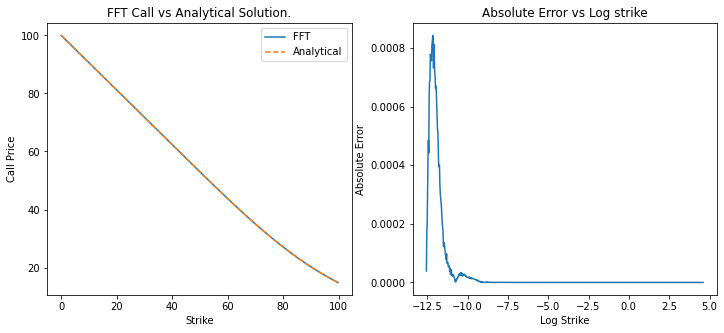

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(np.exp(log_strike)[:atm], fft_call[:atm], label = 'FFT')
axs[0].plot(np.exp(log_strike)[:atm], analytical_call[:atm], ls = '--', label = 'Analytical')
axs[0].set_title('FFT Call vs Analytical Solution.')
axs[0].set(xlabel="Strike", ylabel="Call Price")
axs[0].legend()

abs_error = np.abs(fft_call - analytical_call)
axs[1].plot(log_strike[:atm], abs_error[:atm])
axs[1].set_title('Absolute Error vs Log strike')
axs[1].set(xlabel="Log Strike", ylabel="Absolute Error")

plt.show()

### Put Option Pricing using FFT

To evaluate put option, we use the expression also introduced by Carr and Madan for the put option:

$$P_T(k) \equiv \int_0^K e^{-rT}(e^k - e^s)q_T(s)ds \tag{25}$$

The put option also faces the problem of square-integrable; as $k \rightarrow \infty$, $P_T(k) \rightarrow \infty$. Here we need to also introduce a damping factor $\alpha$, however this time $\alpha$ must be some negative value.

$$p_T(k) \equiv exp(\alpha k)P_T(k), \alpha < 0 \tag{26}$$

Characteristic equation of put option is similar to that of the call, as expressed in Eq. (17):
$$\Psi_T(\upsilon) = \int_{-\infty}^{\infty}e^{i\upsilon k}p_T(k) dk\tag{27}$$

Evaluating Eq. (27):
$$\begin{aligned}
\Psi_T(\upsilon) &= \int_{-\infty}^{\infty}e^{i\upsilon k}\int_0^k e^{\alpha k}e^{-rT}(e^k - e^s)q_T(s)dsdk\\
&= \int_{-\infty}^{\infty}e^{-rT}q_T(s)\int_0^k (e^{(i\upsilon + 1 +\alpha)k} - e^{s + (\alpha + i\upsilon)k})dsdk\\
&= \int_{-\infty}^{\infty}e^{-rT}q_T(s)\int_s^{\infty} (e^{(i\upsilon + 1 +\alpha)k} - e^{s + (\alpha + i\upsilon)k})dkds\\
&= \int_{-\infty}^{\infty}e^{-rT}q_T(s)\bigg[\frac{e^{(i\upsilon + 1 +\alpha)k}}{i\upsilon + 1 +\alpha} - \frac{e^{s + (\alpha + i\upsilon)k}}{\alpha + i\upsilon}\bigg]_s^{\infty}ds
\end{aligned}\tag{28}$$

For Eq. (28) to be valid, $\alpha$ must take a negative value, and more importantly,
$$\alpha + 1 < 0$$

Under this condition, we can further evaluate Eq. (28)
$$\begin{aligned}
\Psi_T(\upsilon) &= \int_{-\infty}^{\infty}e^{-rT}q_T(s)\bigg[\frac{e^{(i\upsilon + 1 +\alpha)k}}{i\upsilon + 1 +\alpha} - \frac{e^{s + (\alpha + i\upsilon)k}}{\alpha + i\upsilon}\bigg]_s^{\infty}ds\\
&= \int_{-\infty}^{\infty}e^{-rT}q_T(s)\bigg(\frac{e^{s + (\alpha + i\upsilon)k}}{\alpha + i\upsilon} - \frac{e^{(i\upsilon + 1 +\alpha)k}}{i\upsilon + 1 +\alpha}\bigg)ds\\
&= \frac{e^{-rT}\phi_T(\upsilon - i(\alpha + 1))}{\alpha^2 + \alpha - \upsilon^2 +i(2\alpha + 1)\upsilon}
\end{aligned}\tag{29}$$

At this point, we observed that in fact, the characteristic function when evaluating the put option is the same as that as the call option! The only different is the dampening factor $\alpha$, that instead of being a positive value, $\alpha \in (-\infty,-1)$!

Since the characteristic function is the same, the FFT implementation will be similar. Here, we will let $\alpha$ take on va;lue of $-2.5$.

In [18]:
alpha_put = -2.5

x_n_put = np.exp(1j*b*eta*n)*char_fxn(eta*n, alpha_put)*eta
x_n_put[0] /= 2
x_n_put[-1] /= 2
real_Xm_put = fft(x_n_put).real
fft_put = np.exp(-alpha_put*log_strike)/np.pi*real_Xm_put

In [19]:
upp_bound = np.where(np.exp(log_strike)<300)[0][-1]

In [20]:
# Black-schoels analytical price
analytical_put = black_scholes_option_pricer(S0, np.exp(log_strike), r, T, sigma, call = False)

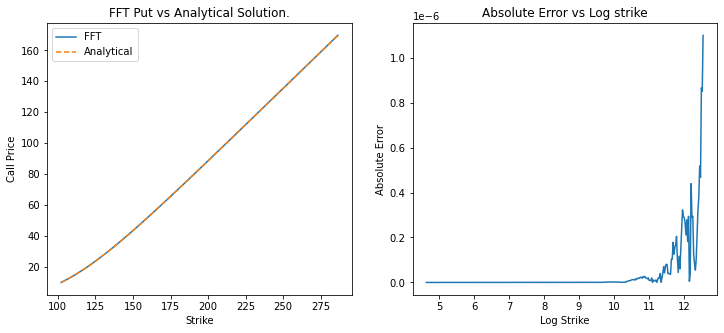

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(np.exp(log_strike)[atm:upp_bound], fft_put[atm:upp_bound], label = 'FFT')
axs[0].plot(np.exp(log_strike)[atm:upp_bound], analytical_put[atm:upp_bound], ls = '--', label = 'Analytical')
axs[0].set_title('FFT Put vs Analytical Solution.')
axs[0].set(xlabel="Strike", ylabel="Call Price")
axs[0].legend()

abs_error = np.abs(fft_put - analytical_put)
axs[1].plot(log_strike[atm:], abs_error[atm:])
axs[1].set_title('Absolute Error vs Log strike')
axs[1].set(xlabel="Log Strike", ylabel="Absolute Error")

plt.show()

# Bibliography



Carr, P. and Madan, D. (1999). "Option valuation using the fast Fourier transform", Journal of Computational Finance 2(4): 61 - 73.

Fang, F. (2010). The Cos Method: An Efficient Fourier Method for Pricing Financial Derivatives.

Madan, D. B., Carr, P., and Chang, E. C. (1998). The variance gamma process and option pricing. European Finance Review, 2, 79 - 105.